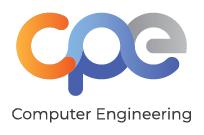

## Artificial Neural Network with Scikit-Learn (Numpy and Pandas included)

---

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [3]:
Rawdata = pd.read_csv('example_dataset.csv',header=None)

In [4]:
Rawdata.shape # ขนาดตาราง แถว-หลัก

(150, 5)

In [5]:
Rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
Rawdata.head(10) # ส่วนหัว 5 Columns แรก

,0,1,2,3,4
0,0.5,0.8,0.5,0.2,Scissors
1,0.5,0.7,0.7,0.5,Scissors
2,0.6,0.9,0.3,0.2,Scissors
3,0.3,0.8,0.3,0.5,Scissors
4,0.4,0.9,0.6,0.5,Scissors
5,0.6,0.8,0.8,0.2,Scissors
6,0.3,0.8,0.2,0.2,Scissors
7,0.4,0.8,0.4,0.4,Scissors
8,0.5,0.7,0.8,0.5,Scissors
9,0.3,0.8,0.6,0.5,Scissors


In [8]:
Rawdata.tail(10)

,0,1,2,3,4
140,0.9,0.4,0.2,0.2,Paper
141,0.6,0.5,0.2,0.1,Paper
142,1.0,0.1,0.5,0.2,Paper
143,0.6,0.5,0.9,0.1,Paper
144,1.0,0.2,0.9,0.1,Paper
145,0.8,0.4,0.3,0.1,Paper
146,1.0,0.5,0.3,0.2,Paper
147,0.8,0.4,0.5,0.2,Paper
148,0.7,0.2,0.7,0.2,Paper
149,0.8,0.2,0.9,0.1,Paper


In [9]:
Rawdata

,0,1,2,3,4
0,0.5,0.8,0.5,0.2,Scissors
1,0.5,0.7,0.7,0.5,Scissors
2,0.6,0.9,0.3,0.2,Scissors
3,0.3,0.8,0.3,0.5,Scissors
4,0.4,0.9,0.6,0.5,Scissors
...,...,...,...,...,...
145,0.8,0.4,0.3,0.1,Paper
146,1.0,0.5,0.3,0.2,Paper
147,0.8,0.4,0.5,0.2,Paper
148,0.7,0.2,0.7,0.2,Paper


In [15]:
# Slicing เพื่อแบ่งข้อมูลระหว่าง Feature กับ Target 
df_Input = Rawdata.iloc[:,0:4] # เอาทุกแถวและเอา Column 0-3
df_Output = Rawdata.iloc[:,4] # เอาทุกแถวและเอา Column ที่ 4

In [16]:
df_Input.head()

,0,1,2,3
0,0.5,0.8,0.5,0.2
1,0.5,0.7,0.7,0.5
2,0.6,0.9,0.3,0.2
3,0.3,0.8,0.3,0.5
4,0.4,0.9,0.6,0.5


In [17]:
df_Input.shape

(150, 4)

In [18]:
df_Output.head()

0    Scissors
1    Scissors
2    Scissors
3    Scissors
4    Scissors
Name: 4, dtype: object

In [19]:
df_Output.shape

(150,)

จริงๆ เราอาจจะต้อง Cleaning Data เช่น Duplicate , Error case โดยใช้ Pandas จัดการข้อมูล
แต่จะใช้ Numpy เพื่อประมวลผลทางคณิตศาสตร์

In [20]:
Input_array = df_Input.to_numpy() 

In [38]:
Input_array

array([[0.5, 0.8, 0.5, 0.2],
       [0.5, 0.7, 0.7, 0.5],
       [0.6, 0.9, 0.3, 0.2],
       [0.3, 0.8, 0.3, 0.5],
       [0.4, 0.9, 0.6, 0.5],
       [0.6, 0.8, 0.8, 0.2],
       [0.3, 0.8, 0.2, 0.2],
       [0.4, 0.8, 0.4, 0.4],
       [0.5, 0.7, 0.8, 0.5],
       [0.3, 0.8, 0.6, 0.5],
       [0.4, 0.7, 0.6, 0.3],
       [0.6, 0.9, 0.4, 0.2],
       [0.4, 0.9, 0.5, 0.5],
       [0.5, 0.8, 0.6, 0.2],
       [0.6, 0.7, 0.2, 0.4],
       [0.3, 0.8, 0.5, 0.3],
       [0.4, 0.7, 0.3, 0.5],
       [0.3, 0.9, 0.7, 0.3],
       [0.5, 0.9, 0.9, 0.5],
       [0.5, 0.9, 0.6, 0.4],
       [0.3, 0.8, 0.8, 0.2],
       [0.5, 0.9, 0.4, 0.5],
       [0.4, 0.8, 0.5, 0.5],
       [0.5, 0.7, 0.5, 0.3],
       [0.4, 0.8, 0.5, 0.5],
       [0.4, 0.8, 0.3, 0.5],
       [0.4, 0.9, 0.3, 0.5],
       [0.3, 0.9, 0.7, 0.2],
       [0.4, 0.9, 0.8, 0.2],
       [0.4, 0.9, 0.7, 0.2],
       [0.3, 0.7, 0.2, 0.3],
       [0.6, 0.9, 0.7, 0.5],
       [0.6, 0.9, 0.8, 0.4],
       [0.3, 0.8, 0.1, 0.3],
       [0.5, 0

In [21]:
Output_array = df_Output.to_numpy()

In [22]:
Output_array

array(['Scissors', 'Scissors', 'Scissors', 'Scissors', 'Scissors',
       'Scissors', 'Scissors', 'Scissors', 'Scissors', 'Scissors',
       'Scissors', 'Scissors', 'Scissors', 'Scissors', 'Scissors',
       'Scissors', 'Scissors', 'Scissors', 'Scissors', 'Scissors',
       'Scissors', 'Scissors', 'Scissors', 'Scissors', 'Scissors',
       'Scissors', 'Scissors', 'Scissors', 'Scissors', 'Scissors',
       'Scissors', 'Scissors', 'Scissors', 'Scissors', 'Scissors',
       'Scissors', 'Scissors', 'Scissors', 'Scissors', 'Scissors',
       'Scissors', 'Scissors', 'Scissors', 'Scissors', 'Scissors',
       'Scissors', 'Scissors', 'Scissors', 'Scissors', 'Scissors',
       'Hammer', 'Hammer', 'Hammer', 'Hammer', 'Hammer', 'Hammer',
       'Hammer', 'Hammer', 'Hammer', 'Hammer', 'Hammer', 'Hammer',
       'Hammer', 'Hammer', 'Hammer', 'Hammer', 'Hammer', 'Hammer',
       'Hammer', 'Hammer', 'Hammer', 'Hammer', 'Hammer', 'Hammer',
       'Hammer', 'Hammer', 'Hammer', 'Hammer', 'Hammer', 'Hamm

In [23]:
Target_set = set(Output_array) # จะดู Unique Output ใน Dataset

In [24]:
Target_set 

{'Hammer', 'Paper', 'Scissors'}

แต่ Set ไม่มี Order ไม่สามารถอ้างอิง Index ได้ - เราจึงต้องทำเป็น List

In [25]:
Class = list(Target_set) #เปลี่ยนกลับเป็น list

In [27]:
Class

['Scissors', 'Hammer', 'Paper']

In [28]:
Class[0]

'Scissors'

In [26]:
NumData = len(Input_array)
print(NumData)

150


เราจะใช้เทคนิค Lookup ในตาราง ให้ Output มันออกมาเป็นค่า 0-2
กฎข้อความระวังในการทำ Classifier - คือ (จำนวน output = จำนวน class) 
(โดยเราจะใช้ตอน 2 คลาสขึ้นไป ใช้ output 3 ตัว)
Output มี 0 , 1 , 2 
แต่ถ้าเราแปลงเป็น Node โดยแต่ละค่าจะมี 001 , 010 , 100 เพื่อให้แยกข้อมูลได้ง่าย

In [29]:
Target_array = np.zeros((NumData), dtype='i') # ให้ทุก Target Array เป็น 0 ทั้งหมด
for i in range(NumData):
    Target_array[i] = Class.index(Output_array[i])

In [30]:
Target_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(Input_array, Target_array, test_size = 0.2) # test_size = 20%
# เราจะไม่เอาตัว Train ไป Test มันจะได้ Accuracy สูง แต่ไม่ได้การันตีว่า Model คุณจะดีพอ
# มันถูกเทรนด์โดยมันรู้ข้อสอบไปแล้ว เราจึงจะต้องทำ Blinding Test

In [33]:
type(y_train)

numpy.ndarray

In [37]:
x_train

array([[0.3, 0.9, 0.1, 0.5],
       [0.3, 0.9, 0.2, 0.9],
       [0.7, 0.2, 0.6, 0.1],
       [0.6, 0.9, 0.4, 0.2],
       [0.4, 0.8, 0.4, 0.4],
       [0.9, 0.1, 0.7, 0.2],
       [0.3, 0.7, 0.3, 0.7],
       [0.4, 0.9, 0.8, 0.2],
       [0.4, 0.9, 0.6, 0.5],
       [0.4, 0.9, 0.5, 0.5],
       [0.2, 0.7, 0.7, 0.4],
       [0.3, 0.9, 0.9, 0.2],
       [0.8, 0.3, 0.8, 0.2],
       [1. , 0.4, 0.8, 0.2],
       [0.3, 0.9, 0.7, 0.2],
       [0.6, 0.1, 0.3, 0.1],
       [0.9, 0.2, 0.8, 0.2],
       [0.3, 0.9, 0.5, 1. ],
       [0.1, 0.7, 0.9, 0.3],
       [0.3, 0.8, 0.8, 0.2],
       [0.7, 0.4, 0.4, 0.2],
       [0.2, 0.7, 0.9, 0.3],
       [0.2, 0.8, 0.6, 0.9],
       [0.5, 0.7, 0.9, 0.4],
       [0.6, 0.9, 0.5, 0.2],
       [0.6, 0.7, 0.9, 0.5],
       [0.2, 0.7, 0.2, 0.2],
       [0.3, 0.7, 0.2, 0.3],
       [0.3, 0.8, 0.1, 0.3],
       [0.1, 0.8, 0.9, 0.9],
       [0.3, 0.9, 0.7, 0.9],
       [0.8, 0.6, 0.4, 0.1],
       [0.2, 0.7, 0.5, 0.5],
       [0.3, 0.9, 0.1, 0.5],
       [0.2, 0

In [34]:
y_train

array([0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2,
       0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2,
       0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 0,
       1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 1, 0, 1, 1, 0, 2, 2, 2], dtype=int32)

In [35]:
len(y_train) # แบ่งเทรนไป 30 ตัว จาก 120 ตัว

120

In [36]:
nn = MLPClassifier(activation='logistic' # activation function
                   ,solver='sgd' # Gradient
                   ,hidden_layer_sizes=6 # 6 Node - 1 Layer
                   ,max_iter = 500 # วน 500 รอบ
                   ,learning_rate='constant' # แอลฟ่าค่าคงที่ 0.01
                   ,learning_rate_init=0.01)

In [39]:
nn.fit(x_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=6,
              learning_rate_init=0.01, max_iter=500, solver='sgd')

In [40]:
y_pred = nn.predict(x_test) # test - แล้วดูว่า output ได้อะไรออกมา เมื่อ input เป็น x_test

In [41]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

In [42]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum/ sum_of_all_elements

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
conf_matrix = confusion_matrix(y_pred,y_test)

In [46]:
y_test

array([2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2,
       1, 0, 0, 2, 2, 0, 1, 0], dtype=int32)

In [47]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

In [48]:
conf_matrix

array([[10,  8,  9],
       [ 0,  2,  1],
       [ 0,  0,  0]], dtype=int64)

In [49]:
acc = accuracy(conf_matrix)

In [50]:
print(acc)

0.4
